In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import itertools
import seaborn as sns
pd.set_option('display.max_columns', None)
np.set_printoptions(suppress=True)


## EDA

In [4]:
data = pd.read_csv('data/shots.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324543 entries, 0 to 324542
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   gameID      324543 non-null  int64  
 1   shooterID   324543 non-null  int64  
 2   assisterID  240199 non-null  float64
 3   minute      324543 non-null  int64  
 4   situation   324543 non-null  object 
 5   lastAction  287647 non-null  object 
 6   shotType    324543 non-null  object 
 7   shotResult  324543 non-null  object 
 8   xGoal       324543 non-null  float64
 9   positionX   324543 non-null  float64
 10  positionY   324543 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 27.2+ MB


In [5]:
data.head(20)

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707
5,81,555,629.0,49,OpenPlay,Pass,LeftFoot,MissedShots,0.021225,0.725,0.545
6,81,631,NaN,64,OpenPlay,NaN,RightFoot,SavedShot,0.103004,0.896,0.597
7,81,629,557.0,72,OpenPlay,Cross,RightFoot,MissedShots,0.106513,0.890,0.534
8,81,629,NaN,76,DirectFreekick,Standard,RightFoot,MissedShots,0.043068,0.747,0.694
9,81,646,647.0,4,OpenPlay,Chipped,LeftFoot,MissedShots,0.297304,0.902,0.610


In [6]:
data.describe()

,gameID,shooterID,assisterID,minute,xGoal,positionX,positionY
count,324543.000000,324543.000000,240199.000000,324543.000000,324543.000000,324543.000000,324543.000000
mean,7832.533381,2691.279211,2685.515439,48.573588,0.108760,0.843968,0.504613
std,4729.926230,2272.984642,2286.099575,26.578582,0.160913,0.090014,0.129372
min,81.000000,2.000000,1.000000,0.000000,0.000000,0.003000,0.000000
25%,3808.000000,845.000000,835.000000,26.000000,0.024060,0.781000,0.414000
50%,7966.000000,2080.000000,2094.000000,49.000000,0.049969,0.863000,0.501000
75%,11954.000000,3785.000000,3744.000000,71.000000,0.094484,0.909000,0.597000
max,16135.000000,9567.000000,9567.000000,104.000000,0.979887,0.999000,0.997000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


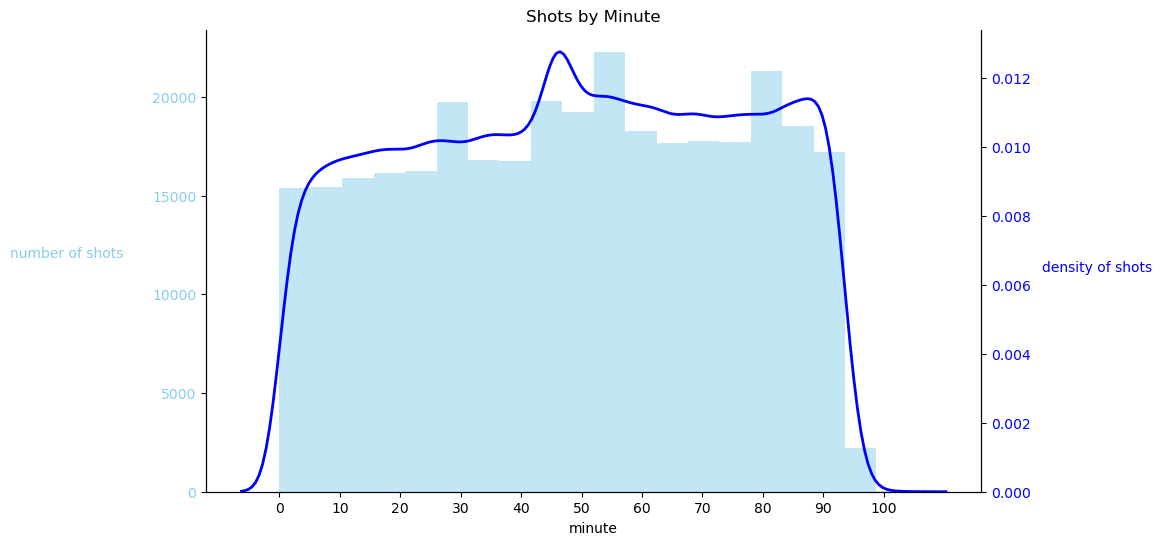

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.hist(data.minute, bins=20, color='skyblue', alpha=0.5, label='Histogram')
ax1.set_ylabel('number of shots', color='skyblue', rotation=0)
ax1.yaxis.set_label_coords(-0.18, 0.5)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.spines['top'].set_visible(False)

ax2 = ax1.twinx()

sns.kdeplot(data.minute, ax=ax2, color='blue', linewidth=2, label='Empirical Density')
ax2.set_ylabel('density of shots', color='blue', rotation=0)
ax2.yaxis.set_label_coords(1.15, 0.5)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.spines['top'].set_visible(False)

ax1.set_xlabel('minute')
ax1.set_xticks(np.arange(0, 101, 10))
plt.title('Shots by Minute')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


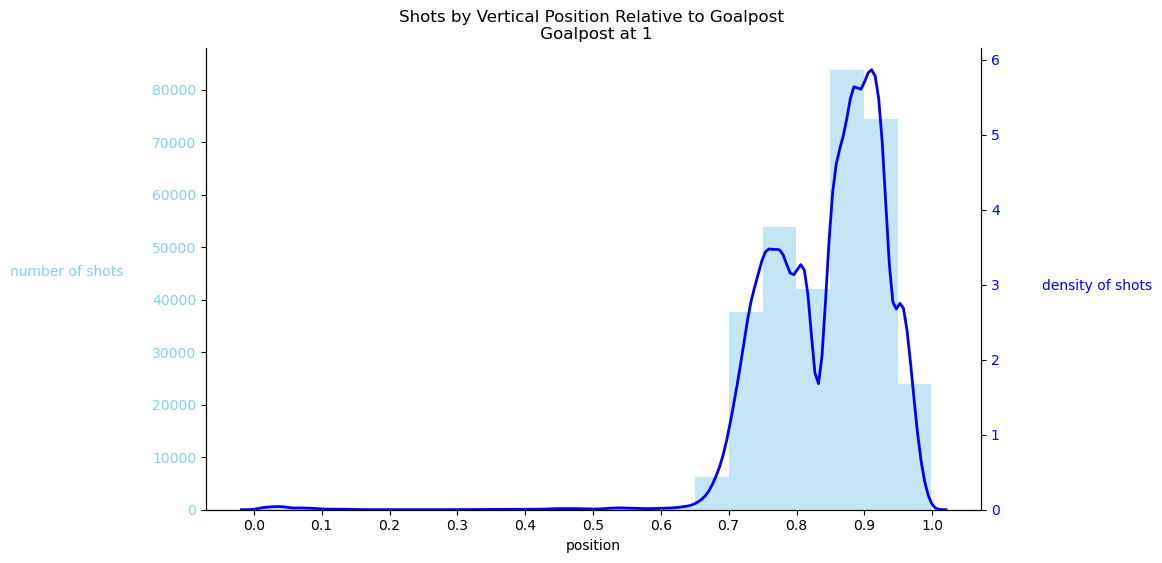

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.hist(data.positionX, bins=20, color='skyblue', alpha=0.5, label='Histogram')
ax1.set_ylabel('number of shots', color='skyblue', rotation=0)
ax1.yaxis.set_label_coords(-0.18, 0.5)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.spines['top'].set_visible(False)

ax2 = ax1.twinx()

sns.kdeplot(data.positionX, ax=ax2, color='blue', linewidth=2, label='Empirical Density')
ax2.set_ylabel('density of shots', color='blue', rotation=0)
ax2.yaxis.set_label_coords(1.15, 0.5)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.spines['top'].set_visible(False)

ax1.set_xlabel('position')
ax1.set_xticks(np.arange(0, 1.01, 0.1))
plt.title('Shots by Vertical Position Relative to Goalpost \n Goalpost at 1')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


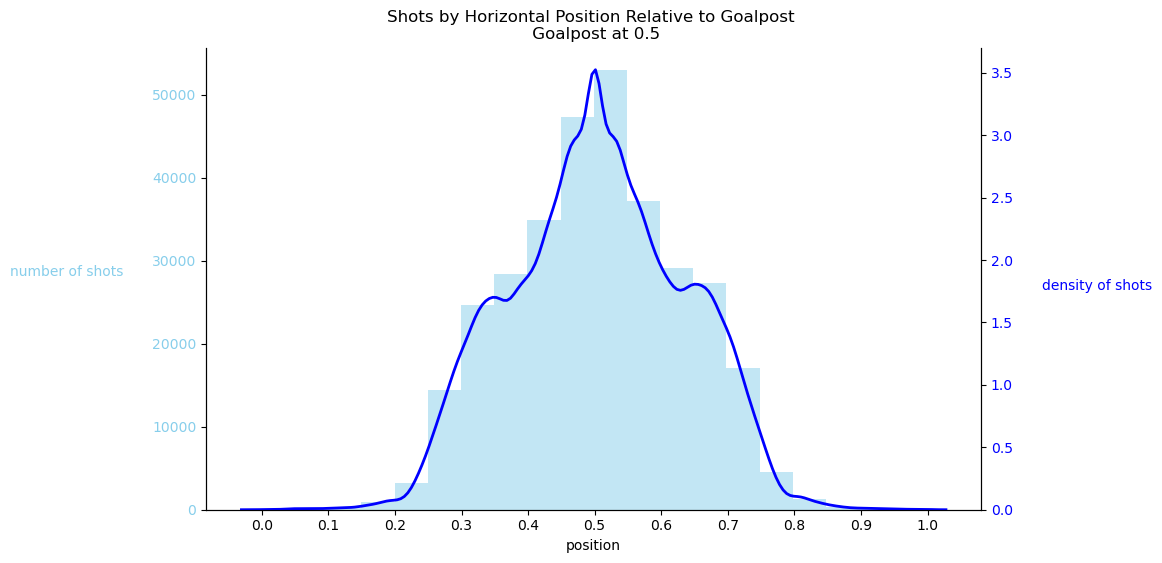

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.hist(data.positionY, bins=20, color='skyblue', alpha=0.5, label='Histogram')
ax1.set_ylabel('number of shots', color='skyblue', rotation=0)
ax1.yaxis.set_label_coords(-0.18, 0.5)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.spines['top'].set_visible(False)

ax2 = ax1.twinx()

sns.kdeplot(data.positionY, ax=ax2, color='blue', linewidth=2, label='Empirical Density')
ax2.set_ylabel('density of shots', color='blue', rotation=0)
ax2.yaxis.set_label_coords(1.15, 0.5)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.spines['top'].set_visible(False)

ax1.set_xlabel('position')
ax1.set_xticks(np.arange(0, 1.01, 0.1))
plt.title('Shots by Horizontal Position Relative to Goalpost \n Goalpost at 0.5')
plt.show()

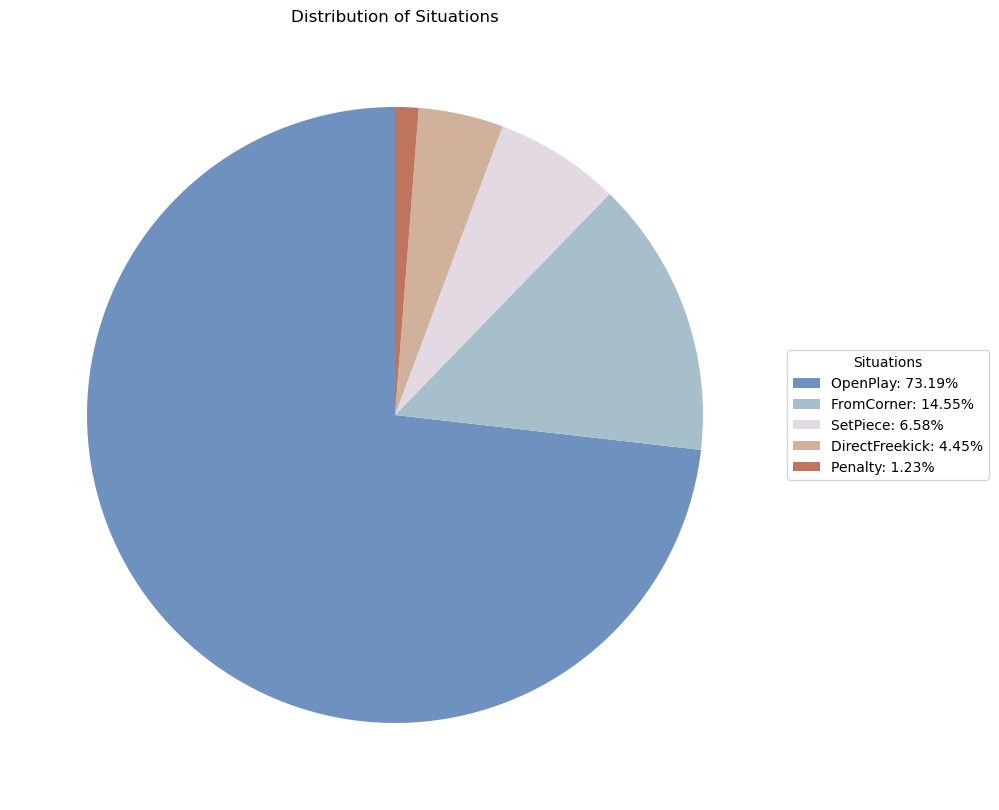

In [10]:
category_counts = data['situation'].value_counts()

plt.figure(figsize=(10, 10))

cmap = plt.get_cmap('twilight_shifted')
colors = [cmap(i) for i in np.linspace(0.3, 0.7, len(category_counts))]

percentages = 100 * category_counts / category_counts.sum()

wedges, texts = plt.pie(
    category_counts,
    startangle=90,
    colors=colors
)

labels_with_percentages = [f"{label}: {percentage:.2f}%" for label, percentage in zip(category_counts.index, percentages)]
plt.legend(
    wedges,
    labels_with_percentages,
    title="Situations",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10  
)

plt.title('Distribution of Situations')

plt.show()

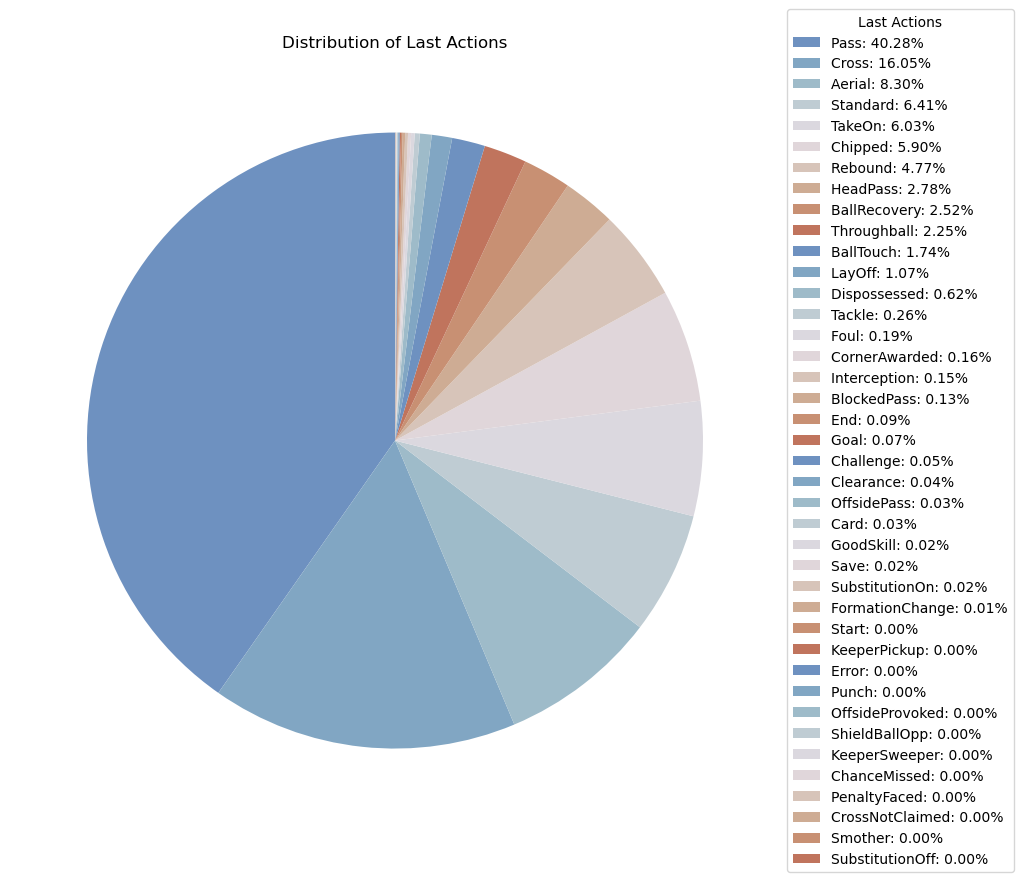

In [11]:
category_counts = data['lastAction'].value_counts()


plt.figure(figsize=(10, 10))

cmap = plt.get_cmap('twilight_shifted')
colors = [cmap(i) for i in np.linspace(0.3, 0.7, 10)]*5


percentages = 100 * category_counts / category_counts.sum()

wedges, texts = plt.pie(
    category_counts,
    startangle=90,
    colors=colors
)

labels_with_percentages = [f"{label}: {percentage:.2f}%" for label, percentage in zip(category_counts.index, percentages)]
plt.legend(
    wedges,
    labels_with_percentages,
    title="Last Actions",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

plt.title('Distribution of Last Actions')

plt.show()

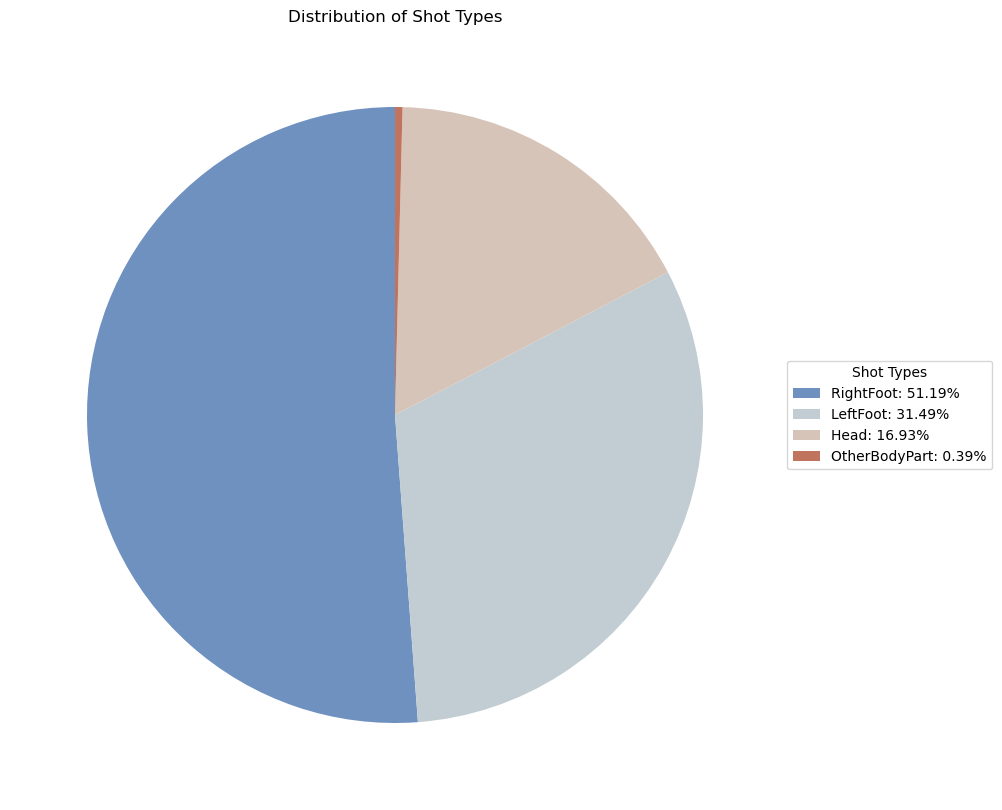

In [12]:
category_counts = data['shotType'].value_counts()


plt.figure(figsize=(10, 10))

cmap = plt.get_cmap('twilight_shifted')
colors = [cmap(i) for i in np.linspace(0.3, 0.7, len(category_counts))]

percentages = 100 * category_counts / category_counts.sum()

wedges, texts = plt.pie(
    category_counts,
    startangle=90,
    colors=colors
)

labels_with_percentages = [f"{label}: {percentage:.2f}%" for label, percentage in zip(category_counts.index, percentages)]
plt.legend(
    wedges,
    labels_with_percentages,
    title="Shot Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10  
)

plt.title('Distribution of Shot Types')

plt.show()

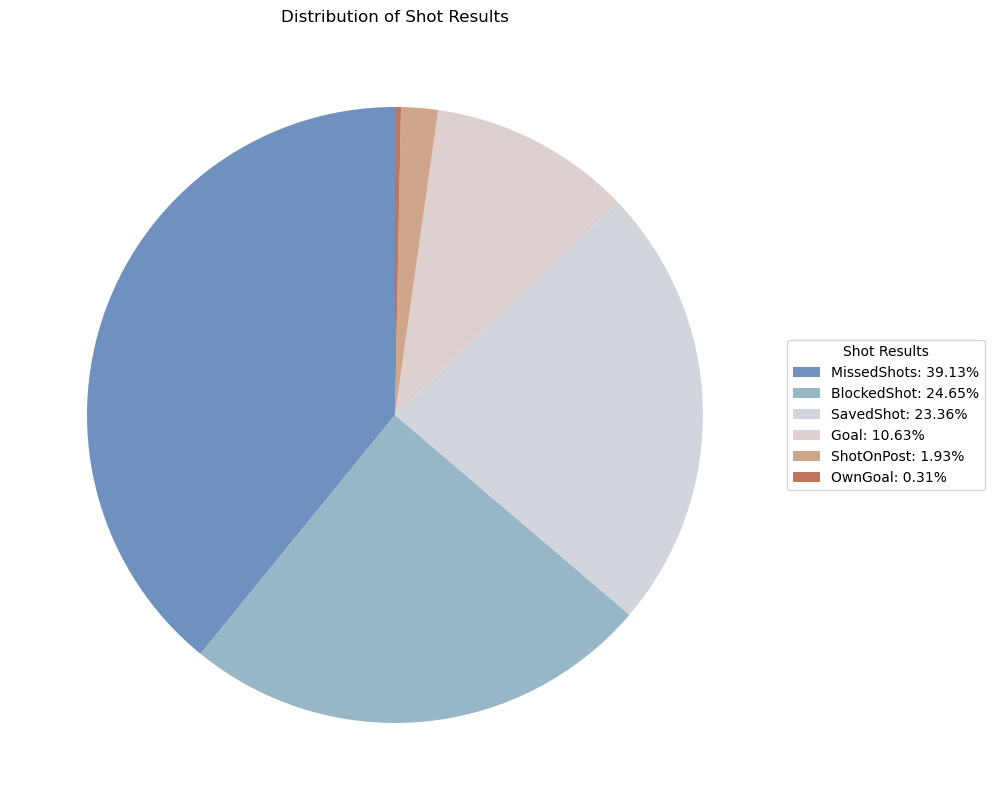

In [13]:
category_counts = data['shotResult'].value_counts()


plt.figure(figsize=(10, 10))

cmap = plt.get_cmap('twilight_shifted')
colors = [cmap(i) for i in np.linspace(0.3, 0.7, len(category_counts))]

percentages = 100 * category_counts / category_counts.sum()

wedges, texts = plt.pie(
    category_counts,
    startangle=90,
    colors=colors
)

labels_with_percentages = [f"{label}: {percentage:.2f}%" for label, percentage in zip(category_counts.index, percentages)]
plt.legend(
    wedges,
    labels_with_percentages,
    title="Shot Results",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10  
)

plt.title('Distribution of Shot Results')

plt.show()

## Data preprocessing

In [14]:
data = data[data['lastAction'].isna()==False]
data = data[data['shotType']!='OtherBodyPart']
data['horizontal_dist'] = abs(0.5-data['positionY'])
data['vertical_dist'] = 1-data['positionX']

In [15]:
def has_assister(x):
    if pd.isna(x):
        return False
    else:
        return True
data['has_assister'] = data['assisterID'].apply(has_assister)

In [16]:
def was_passed(x):
    if pd.isna(x):
        return x
    elif x=='Pass':
        return True
    else:
        return False
data['was_passed'] = data['lastAction'].apply(was_passed)

In [17]:
results = data['shotResult'].unique()
d = {}
for r in results:
    if 'Goal' in r:
        d[r] = 1
    else:
        d[r] = 0
data['is_goal'] = data['shotResult'].map(d)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286499 entries, 0 to 324542
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gameID           286499 non-null  int64  
 1   shooterID        286499 non-null  int64  
 2   assisterID       237834 non-null  float64
 3   minute           286499 non-null  int64  
 4   situation        286499 non-null  object 
 5   lastAction       286499 non-null  object 
 6   shotType         286499 non-null  object 
 7   shotResult       286499 non-null  object 
 8   xGoal            286499 non-null  float64
 9   positionX        286499 non-null  float64
 10  positionY        286499 non-null  float64
 11  horizontal_dist  286499 non-null  float64
 12  vertical_dist    286499 non-null  float64
 13  has_assister     286499 non-null  bool   
 14  was_passed       286499 non-null  bool   
 15  is_goal          286499 non-null  int64  
dtypes: bool(2), float64(6), int64(4), object(4)

In [19]:
data.head(20)

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY,horizontal_dist,vertical_dist,has_assister,was_passed,is_goal
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421,0.079,0.206,False,False,0
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627,0.127,0.140,True,True,0
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333,0.167,0.157,True,True,0
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533,0.033,0.152,False,False,0
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707,0.207,0.188,True,False,0
5,81,555,629.0,49,OpenPlay,Pass,LeftFoot,MissedShots,0.021225,0.725,0.545,0.045,0.275,True,True,0
7,81,629,557.0,72,OpenPlay,Cross,RightFoot,MissedShots,0.106513,0.890,0.534,0.034,0.110,True,False,0
8,81,629,NaN,76,DirectFreekick,Standard,RightFoot,MissedShots,0.043068,0.747,0.694,0.194,0.253,False,False,0
9,81,646,647.0,4,OpenPlay,Chipped,LeftFoot,MissedShots,0.297304,0.902,0.610,0.110,0.098,True,False,0
10,81,647,646.0,11,OpenPlay,Pass,RightFoot,BlockedShot,0.030376,0.879,0.247,0.253,0.121,True,True,0


In [20]:
data.describe()

,gameID,shooterID,assisterID,minute,xGoal,positionX,positionY,horizontal_dist,vertical_dist,is_goal
count,286499.000000,286499.000000,237834.000000,286499.000000,286499.000000,286499.000000,286499.000000,286499.000000,286499.000000,286499.000000
mean,7831.846949,2682.582121,2684.642246,48.624145,0.111930,0.847315,0.505004,0.105082,0.152685,0.111711
std,4730.793471,2268.747763,2285.069313,26.544847,0.162478,0.084897,0.129897,0.076524,0.084897,0.315011
min,81.000000,2.000000,1.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.001000,0.000000
25%,3807.000000,843.000000,835.000000,26.000000,0.025283,0.784000,0.415000,0.040000,0.090000,0.000000
50%,7971.000000,2071.000000,2094.000000,49.000000,0.051713,0.866000,0.502000,0.092000,0.134000,0.000000
75%,11953.000000,3769.000000,3741.000000,71.000000,0.098742,0.910000,0.597000,0.163000,0.216000,0.000000
max,16135.000000,9567.000000,9567.000000,103.000000,0.979887,0.999000,0.995000,0.500000,0.997000,1.000000


In [21]:
data['has_assister'].mean()

0.8301390231728557

In [22]:
data.groupby('is_goal')['has_assister'].mean()

is_goal
0    0.840256
1    0.749695
Name: has_assister, dtype: float64

In [23]:
data['was_passed'].mean()

0.40431205693562633

In [24]:
data.groupby('is_goal')['was_passed'].mean()

is_goal
0    0.416776
1    0.305202
Name: was_passed, dtype: float64

## Model Selection

In [25]:
s_full = 'is_goal ~ minute + vertical_dist + horizontal_dist + C(has_assister) + C(was_passed) + C(situation, Treatment(reference="OpenPlay")) + C(shotType, Treatment(reference="RightFoot"))'

In [26]:
xvars = [x.strip() for x  in s_full.split('~')[1].split('+')]
print(xvars)

['minute', 'vertical_dist', 'horizontal_dist', 'C(has_assister)', 'C(was_passed)', 'C(situation, Treatment(reference="OpenPlay"))', 'C(shotType, Treatment(reference="RightFoot"))']


In [27]:
specifications = []
for r in range(1, len(xvars) + 1):
    combinations = itertools.combinations(xvars, r)
    for combo in combinations:
        specifications.append(combo)

In [28]:
def get_criteria(specification,data):
    model = smf.ols(formula=specification, data=data).fit()
    adjusted_r2 = model.rsquared_adj
    ols_aic = model.aic
    ols_bic = model.bic
    model = smf.logit(formula=specification, data=data).fit()
    logit_aic = model.aic
    logit_bic = model.bic
    pseudo_r2 = 1 - (model.llf / model.llnull)
    return np.round([adjusted_r2, ols_aic, ols_bic, pseudo_r2, logit_aic, logit_bic],3)

In [29]:
ols_r2 = {}
ols_aic = {}
ols_bic = {}
logit_r2 = {}
logit_aic = {}
logit_bic = {}
for i,s in enumerate(specifications):
    specification = 'is_goal ~ ' + ' + '.join(s)
    d = get_criteria(specification,data)
    ols_r2[s] = d[0]
    ols_aic[s] = d[1]
    ols_bic[s] = d[2]
    logit_r2[s] = d[3]
    logit_aic[s] = d[4]
    logit_bic[s] = d[5]
    print('')
    print(f'Specification {i+1} done')
    print('')

Optimization terminated successfully.
         Current function value: 0.349951
         Iterations 6

Specification 1 done

Optimization terminated successfully.
         Current function value: 0.336871
         Iterations 7

Specification 2 done

Optimization terminated successfully.
         Current function value: 0.330148
         Iterations 7

Specification 3 done

Optimization terminated successfully.
         Current function value: 0.347445
         Iterations 6

Specification 4 done

Optimization terminated successfully.
         Current function value: 0.347434
         Iterations 6

Specification 5 done

Optimization terminated successfully.
         Current function value: 0.332481
         Iterations 7

Specification 6 done

Optimization terminated successfully.
         Current function value: 0.349960
         Iterations 6

Specification 7 done

Optimization terminated successfully.
         Current function value: 0.336779
         Iterations 7

Specification 8 done



In [ ]:
def get_best(d,high_is_good):
    if high_is_good==True:
        d = sorted(d.items(),key = lambda x: -x[1])
    else:
        d = sorted(d.items(),key = lambda x: x[1])
    return d[0][0]

In [ ]:
print(get_best(ols_r2,True))
print(get_best(ols_aic,False))
print(get_best(ols_bic,False))
print(get_best(logit_r2,True))
print(get_best(logit_aic,False))
print(get_best(logit_bic,False))

('vertical_dist', 'horizontal_dist', 'C(has_assister)', 'C(situation, Treatment(reference="OpenPlay"))', 'C(shotType, Treatment(reference="RightFoot"))')
('minute', 'vertical_dist', 'horizontal_dist', 'C(has_assister)', 'C(was_passed)', 'C(situation, Treatment(reference="OpenPlay"))', 'C(shotType, Treatment(reference="RightFoot"))')
('vertical_dist', 'horizontal_dist', 'C(has_assister)', 'C(was_passed)', 'C(situation, Treatment(reference="OpenPlay"))', 'C(shotType, Treatment(reference="RightFoot"))')
('vertical_dist', 'horizontal_dist', 'C(has_assister)', 'C(situation, Treatment(reference="OpenPlay"))', 'C(shotType, Treatment(reference="RightFoot"))')
('minute', 'vertical_dist', 'horizontal_dist', 'C(has_assister)', 'C(was_passed)', 'C(situation, Treatment(reference="OpenPlay"))', 'C(shotType, Treatment(reference="RightFoot"))')
('vertical_dist', 'horizontal_dist', 'C(has_assister)', 'C(situation, Treatment(reference="OpenPlay"))', 'C(shotType, Treatment(reference="RightFoot"))')


## OLS & Logistic Regressions

In [ ]:
s_full = 'is_goal ~ minute + vertical_dist + horizontal_dist + C(has_assister) + C(was_passed) + C(situation, Treatment(reference="OpenPlay")) + C(shotType, Treatment(reference="RightFoot"))'

In [ ]:
ols_model  = smf.ols(s_full,data=data).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                is_goal   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     3183.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:                -59060.
No. Observations:              286499   AIC:                         1.181e+05
Df Residuals:                  286487   BIC:                         1.183e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
logit_model  = smf.logit(s_full,data=data).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.303761
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                is_goal   No. Observations:               286499
Model:                          Logit   Df Residuals:                   286487
Method:                           MLE   Df Model:                           11
Date:                Tue, 01 Oct 2024   Pseudo R-squ.:                  0.1323
Time:                        13:57:34   Log-Likelihood:                -87027.
converged:                       True   LL-Null:                   -1.0030e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
In

## QQ Plots

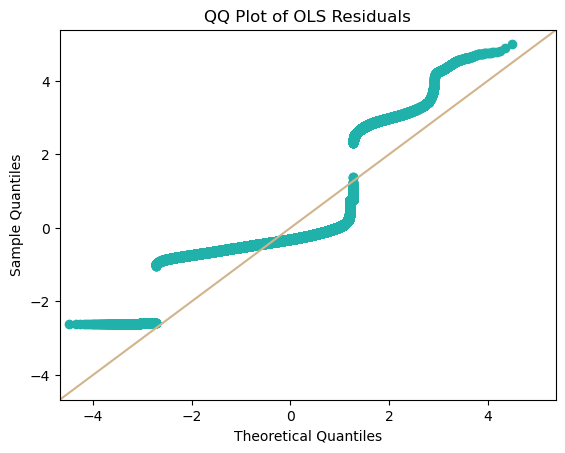

In [ ]:
residuals = ols_model.resid

standardized_residuals = (residuals-np.mean(residuals))/np.std(residuals)

qq_plot=sm.qqplot(standardized_residuals, markerfacecolor='lightseagreen', markeredgecolor='lightseagreen', line='45')
plt.gca().get_lines()[1].set_color('tan')
plt.title('QQ Plot of OLS Residuals')
plt.show()

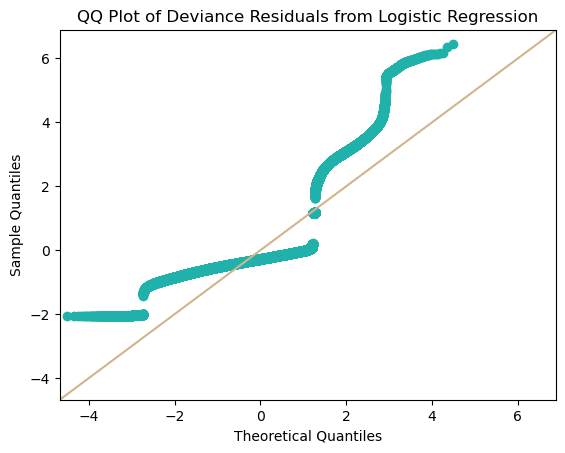

In [ ]:
pred_probs = logit_model.predict(data)

observed = data['is_goal']

deviance_residuals = np.sign(observed - pred_probs) * np.sqrt(
    -2 * (observed * np.log(pred_probs) + (1 - observed) * np.log(1 - pred_probs))
)

standardized_residuals = (deviance_residuals-np.mean(deviance_residuals))/np.std(deviance_residuals)

qq_plot=sm.qqplot(standardized_residuals, markerfacecolor='lightseagreen', markeredgecolor='lightseagreen', line='45')
plt.gca().get_lines()[1].set_color('tan')
plt.title('QQ Plot of Deviance Residuals from Logistic Regression')
plt.show()

## Correlation and VIF

In [ ]:
data[['vertical_dist','horizontal_dist','minute']].corr()

,vertical_dist,horizontal_dist,minute
vertical_dist,1.000000,0.128355,-0.016391
horizontal_dist,0.128355,1.000000,-0.022853
minute,-0.016391,-0.022853,1.000000


In [ ]:
X = data[['vertical_dist','horizontal_dist','minute']]

X = sm.add_constant(X)

vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.head()

,features,VIF
0,const,9.118358
1,vertical_dist,1.016938
2,horizontal_dist,1.017196
3,minute,1.000707


## Influential Points

In [ ]:
influence = ols_model.get_influence()
# highest Cook's distance
cooks_d = influence.cooks_distance[0]
print('Top 20 values in terms of Cook\'s distance for OLS regression:')
print(np.sort(cooks_d)[::-1][:20])

Top 20 values in terms of Cook's distance for OLS regression:
[0.00106874 0.00106436 0.00104911 0.00104707 0.00104454 0.00103741
 0.00103595 0.00102523 0.00102379 0.00101797 0.00101359 0.00101147
 0.00101117 0.00101116 0.00100594 0.00100512 0.0010003  0.00099993
 0.00099697 0.00099134]


In [ ]:
influence = logit_model.get_influence()
# highest Cook's distance
cooks_d = influence.cooks_distance[0]
print('Top 20 values in terms of Cook\'s distance for logistic regression:')
print(np.sort(cooks_d)[::-1][:20])

Top 20 values in terms of Cook's distance for logistic regression:
[0.00088254 0.00087119 0.00086942 0.00086863 0.00086811 0.00086156
 0.00085788 0.00085667 0.00085606 0.00085502 0.00085415 0.00085111
 0.00084753 0.00084486 0.00084469 0.00084125 0.00084019 0.00083482
 0.00083424 0.0008339 ]


## Filtering For Attackers

In [ ]:
shots_per_player = data['shooterID'].value_counts()

players_with_more_than_n_shots = shots_per_player[shots_per_player >= 210].index

filtered_df = data[data['shooterID'].isin(players_with_more_than_n_shots)]

filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 102380 entries, 1 to 324516
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gameID           102380 non-null  int64  
 1   shooterID        102380 non-null  int64  
 2   assisterID       85401 non-null   float64
 3   minute           102380 non-null  int64  
 4   situation        102380 non-null  object 
 5   lastAction       102380 non-null  object 
 6   shotType         102380 non-null  object 
 7   shotResult       102380 non-null  object 
 8   xGoal            102380 non-null  float64
 9   positionX        102380 non-null  float64
 10  positionY        102380 non-null  float64
 11  horizontal_dist  102380 non-null  float64
 12  vertical_dist    102380 non-null  float64
 13  has_assister     102380 non-null  bool   
 14  was_passed       102380 non-null  bool   
 15  is_goal          102380 non-null  int64  
dtypes: bool(2), float64(6), int64(4), object(4)

In [ ]:
ols_model  = smf.ols(s_full,data=filtered_df).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                is_goal   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1579.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:57:36   Log-Likelihood:                -28331.
No. Observations:              102380   AIC:                         5.669e+04
Df Residuals:                  102368   BIC:                         5.680e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
logit_model  = smf.logit(s_full,data=filtered_df).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.333881
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                is_goal   No. Observations:               102380
Model:                          Logit   Df Residuals:                   102368
Method:                           MLE   Df Model:                           11
Date:                Tue, 01 Oct 2024   Pseudo R-squ.:                  0.1689
Time:                        13:57:37   Log-Likelihood:                -34183.
converged:                       True   LL-Null:                       -41128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
In

## Multinomial Logistic (Softmax) Regression

In [ ]:
data['shotResult'].unique()

array(['BlockedShot', 'MissedShots', 'SavedShot', 'OwnGoal', 'Goal',
       'ShotOnPost'], dtype=object)

In [ ]:
cat_mapping = {}
cat_mapping[0] = 'off_target'
cat_mapping[1] = 'on_target' #but not goal
cat_mapping[2] = 'goal'

In [ ]:
shot_mapping = {}
shot_mapping['MissedShots'] = 0
shot_mapping['ShotOnPost'] = 0
shot_mapping['SavedShot'] = 1
shot_mapping['BlockedShot'] = 1
shot_mapping['Goal'] = 2
shot_mapping['OwnGoal'] = 2
data['3cat'] = data['shotResult'].map(shot_mapping)
data.head(20)

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY,horizontal_dist,vertical_dist,has_assister,was_passed,is_goal,3cat
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421,0.079,0.206,False,False,0,1
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627,0.127,0.140,True,True,0,1
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333,0.167,0.157,True,True,0,1
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533,0.033,0.152,False,False,0,0
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707,0.207,0.188,True,False,0,1
5,81,555,629.0,49,OpenPlay,Pass,LeftFoot,MissedShots,0.021225,0.725,0.545,0.045,0.275,True,True,0,0
7,81,629,557.0,72,OpenPlay,Cross,RightFoot,MissedShots,0.106513,0.890,0.534,0.034,0.110,True,False,0,0
8,81,629,NaN,76,DirectFreekick,Standard,RightFoot,MissedShots,0.043068,0.747,0.694,0.194,0.253,False,False,0,0
9,81,646,647.0,4,OpenPlay,Chipped,LeftFoot,MissedShots,0.297304,0.902,0.610,0.110,0.098,True,False,0,0
10,81,647,646.0,11,OpenPlay,Pass,RightFoot,BlockedShot,0.030376,0.879,0.247,0.253,0.121,True,True,0,1


In [ ]:
data['3cat'].value_counts(normalize=True)

3cat
1    0.482124
0    0.406165
2    0.111711
Name: proportion, dtype: float64

In [ ]:
data['dummy_assister'] = (data['has_assister']==True).astype(int)

data['dummy_pass'] = (data['was_passed']==True).astype(int)

data['dummy_FromCorner'] = (data['situation']=='FromCorner').astype(int)
data['dummy_SetPiece'] = (data['situation']=='SetPiece').astype(int)
data['dummy_DirectFreekick'] = (data['situation']=='DirectFreekick').astype(int)
data['dummy_Penalty'] = (data['situation']=='Penalty').astype(int)

data['dummy_LeftFoot'] = (data['shotType']=='LeftFoot').astype(int)
data['dummy_Head'] = (data['shotType']=='Head').astype(int)

In [ ]:
data.head()

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY,horizontal_dist,vertical_dist,has_assister,was_passed,is_goal,3cat,dummy_assister,dummy_pass,dummy_FromCorner,dummy_SetPiece,dummy_DirectFreekick,dummy_Penalty,dummy_LeftFoot,dummy_Head
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421,0.079,0.206,False,False,0,1,0,0,0,0,1,0,1,0
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627,0.127,0.140,True,True,0,1,1,1,0,1,0,0,0,0
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333,0.167,0.157,True,True,0,1,1,1,0,0,0,0,1,0
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533,0.033,0.152,False,False,0,0,0,0,0,0,0,0,1,0
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707,0.207,0.188,True,False,0,1,1,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['gameID', 'shooterID', 'assisterID', 'minute', 'situation',
       'lastAction', 'shotType', 'shotResult', 'xGoal', 'positionX',
       'positionY', 'horizontal_dist', 'vertical_dist', 'has_assister',
       'was_passed', 'is_goal', '3cat', 'dummy_assister', 'dummy_pass',
       'dummy_FromCorner', 'dummy_SetPiece', 'dummy_DirectFreekick',
       'dummy_Penalty', 'dummy_LeftFoot', 'dummy_Head'],
      dtype='object')

In [ ]:
# s_full
X = data[['minute','horizontal_dist','vertical_dist', 'dummy_assister', 'dummy_pass', 'dummy_FromCorner', 'dummy_SetPiece',
       'dummy_DirectFreekick','dummy_Penalty', 'dummy_LeftFoot', 'dummy_Head']]
y = data[['3cat']]
X = sm.add_constant(X)

In [ ]:
mnl_model  = sm.MNLogit(y,X).fit()
print(mnl_model.summary())

Optimization terminated successfully.
         Current function value: 0.898695
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                   3cat   No. Observations:               286499
Model:                        MNLogit   Df Residuals:                   286475
Method:                           MLE   Df Model:                           22
Date:                Tue, 01 Oct 2024   Pseudo R-squ.:                 0.06633
Time:                        13:57:41   Log-Likelihood:            -2.5748e+05
converged:                       True   LL-Null:                   -2.7577e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
              3cat=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6596      0.020     33.089      0.000       0.621       0.699

In [ ]:
shot_mapping = {}
shot_mapping['MissedShots'] = 1 #off_target
shot_mapping['ShotOnPost'] = 1
shot_mapping['SavedShot'] = 0 #on_target but not goal
shot_mapping['BlockedShot'] = 0
shot_mapping['Goal'] = 2 #goal
shot_mapping['OwnGoal'] = 2
data['3cat'] = data['shotResult'].map(shot_mapping)
y = data[['3cat']]
mnl_model  = sm.MNLogit(y,X).fit()
print(mnl_model.summary())

Optimization terminated successfully.
         Current function value: 0.898695
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                   3cat   No. Observations:               286499
Model:                        MNLogit   Df Residuals:                   286475
Method:                           MLE   Df Model:                           22
Date:                Tue, 01 Oct 2024   Pseudo R-squ.:                 0.06633
Time:                        13:57:45   Log-Likelihood:            -2.5748e+05
converged:                       True   LL-Null:                   -2.7577e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
              3cat=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6596      0.020    -33.089      0.000      -0.699      -0.621